# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

  Using cached iso3166-2.1.1-py3-none-any.whl (9.8 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\ctfua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# Shape of df_data
print("Shape of df_data:", df_data.shape)
# Number of rows and columns
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
# Column names
column_names = df_data.columns
print("Column names:", column_names)
# Check for NaN values
print("Number of NaN values:\n", df_data.isna().sum())
# Check for duplicates
num_duplicates = df_data.duplicated().sum()
print("Number of duplicates:", num_duplicates)


Shape of df_data: (4324, 9)
Number of rows: 4324
Number of columns: 9
Column names: Index(['Sno', 'SNO', 'Organisation', 'Location', 'Date', 'Detail',
       'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')
Number of NaN values:
 Sno                  0
SNO                  0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64
Number of duplicates: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
# Identify columns containing junk data
junk_columns = ['Sno', 'SNO']  # Replace with actual column names to be removed

# Drop the junk columns
df_data = df_data.drop(junk_columns, axis=1)

# Verify the updated DataFrame
print("Updated DataFrame after removing junk columns:")
print(df_data.head())


Updated DataFrame after removing junk columns:
  Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0 

## Descriptive Statistics

In [ ]:
# Compute descriptive statistics
statistics = df_data.describe()

# Print the statistics
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
       Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail  \
count                         4324                                 4324   
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status  Price Mission_Status  
count            4324    964           4324  
unique              2     56              4  
top     StatusRetired  450.0        Success  
freq             3534    136           3879  


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
# Count the number of launches per company
launches_by_company = df_data['Organisation'].value_counts().reset_index()
# Rename the columns
launches_by_company.columns = ['Organisation', 'Number of Launches']

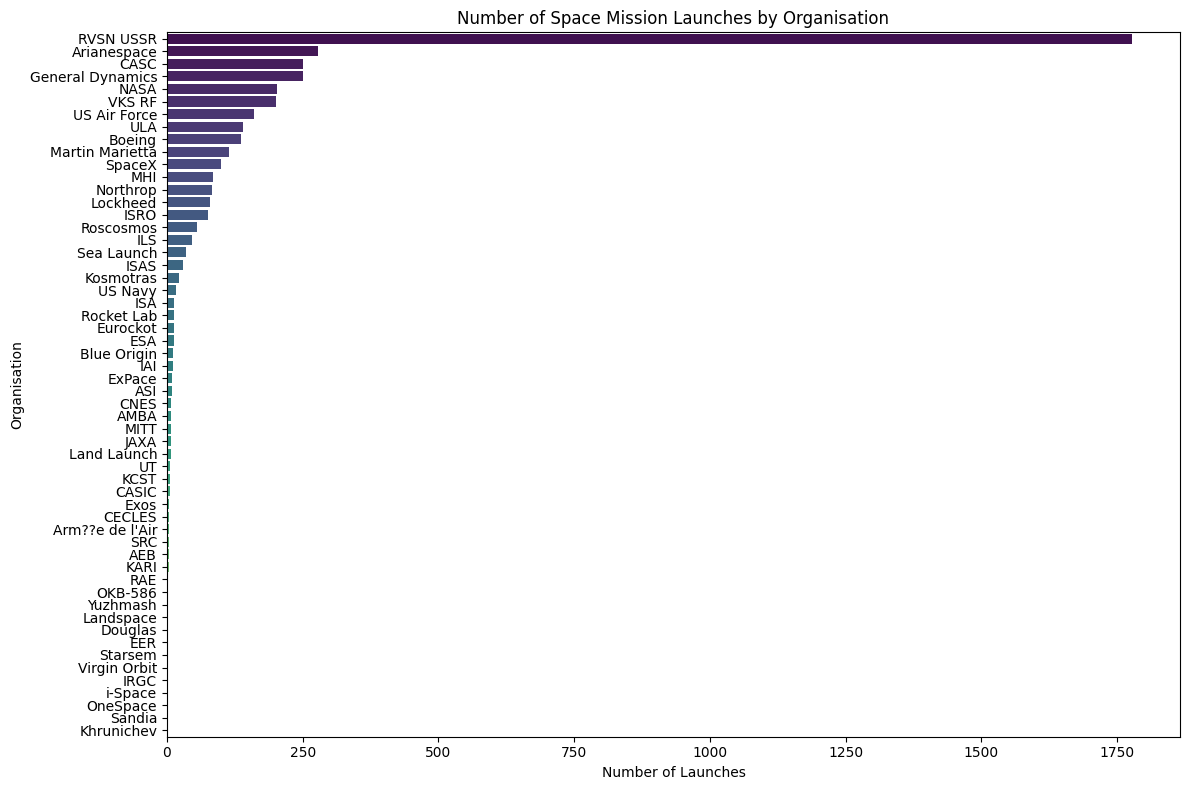

In [ ]:
# Sort the data by number of launches in descending order
launches_by_company = launches_by_company.sort_values('Number of Launches', ascending=False)
# Create the bar chart
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
sns.barplot(x='Number of Launches', y='Organisation', data=launches_by_company, palette='viridis')
plt.xlabel('Number of Launches')
plt.ylabel('Organisation')
plt.title('Number of Space Mission Launches by Organisation')

plt.tight_layout()  # Add spacing between plot elements


In [ ]:
plt.show()  # Display the plot

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
# Count the number of active and retired rockets
rocket_status_counts = df_data['Rocket_Status'].value_counts()
# Count the number of successful and failed missions
mission_status_counts = df_data['Mission_Status'].value_counts()

In [ ]:

print("Number of Active Rockets:", rocket_status_counts['StatusActive'])
print("Number of Retired Rockets:", rocket_status_counts['StatusRetired'])


Number of Active Rockets: 790
Number of Retired Rockets: 3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
# Count the number of successful and failed missions
mission_status_counts = df_data['Mission_Status'].value_counts()

In [ ]:
# Display the counts
print("Number of Successful Missions:", mission_status_counts['Success'])
print("Number of Failed Missions:", mission_status_counts['Failure'])

Number of Successful Missions: 3879
Number of Failed Missions: 339


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, '50.0'),
  Text(1, 0, '29.75'),
  Text(2, 0, '65.0'),
  Text(3, 0, '145.0'),
  Text(4, 0, '64.68'),
  Text(5, 0, '48.5'),
  Text(6, 0, '90.0'),
  Text(7, 0, '46.0'),
  Text(8, 0, '28.3'),
  Text(9, 0, '29.15'),
  Text(10, 0, '7.5'),
  Text(11, 0, '30.8'),
  Text(12, 0, '5.3'),
  Text(13, 0, '12.0'),
  Text(14, 0, '112.5'),
  Text(15, 0, '120.0'),
  Text(16, 0, '153.0'),
  Text(17, 0, '200.0'),
  Text(18, 0, '85.0'),
  Text(19, 0, '115.0'),
  Text(20, 0, '41.8'),
  Text(21, 0, '21.0'),
  Text(22, 0, '31.0'),
  Text(23, 0, '40.0'),
  Text(24, 0, '164.0'),
  Text(25, 0, '62.0'),
  Text(26, 0, '37.0'),
  Text(27, 0, '350.0'),
  Text(28, 0, '39.0'),
  Text(

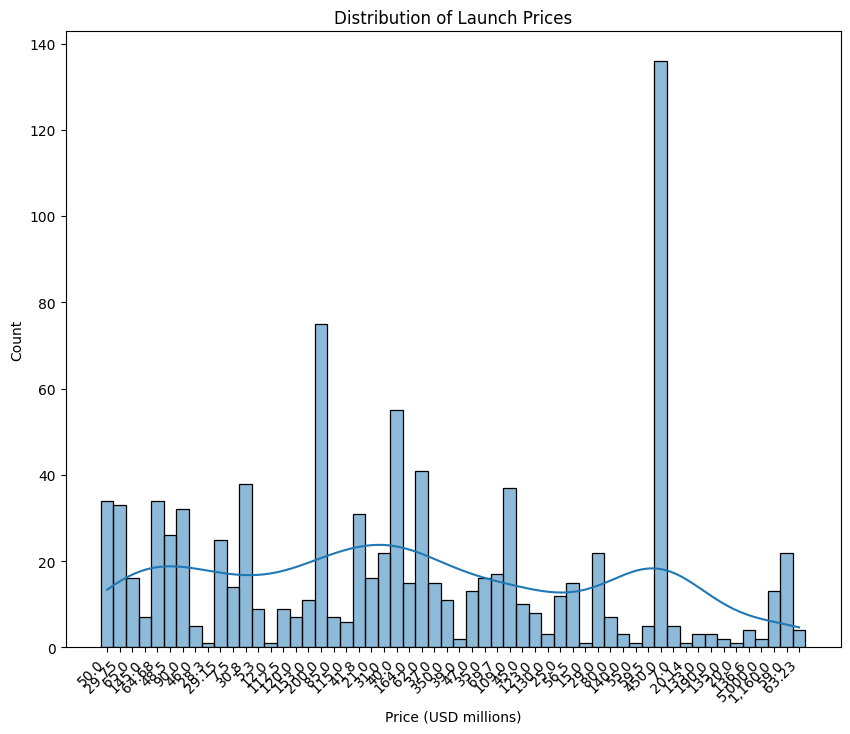

In [ ]:
# Filter out missing values in the Price column
launch_prices = df_data['Price'].dropna()

# Plot the histogram with wider spacing on the x-axis
plt.figure(figsize=(10, 8))
sns.histplot(launch_prices, bins=20, kde=True)

# Set plot title and axis labels
plt.title('Distribution of Launch Prices')
plt.xlabel('Price (USD millions)')
plt.ylabel('Count')

# Adjust x-axis spacing
plt.xticks(rotation=45, ha='right')

In [ ]:
plt.show()  # Display the plot

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
# Extract country from location
def extract_country(location):
    words = location.split()
    country_name = words[-1]
    return country_name


df_data['Country'] = df_data['Location'].apply(extract_country)

# Wrangle country names
country_mapping = {
    'Russia': 'RUS',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'RUS',
    'Gran Canaria': 'USA'
}

df_data['Country'] = df_data['Country'].replace(country_mapping)

# Group by country and count the number of launches
launches_by_country = df_data['Country'].value_counts().reset_index()
launches_by_country.columns = ['Country', 'Launches']

# Create choropleth map
fig = px.choropleth(
    launches_by_country,
    locations='Country',
    locationmode='ISO-3',
    color='Launches',
    color_continuous_scale='matter',
    title='Number of Launches by Country'
)

# Update layout and show the map
fig.update_layout(
    margin=dict(l=0, r=0, t=60, b=0),
    title_font=dict(size=20),
    coloraxis_colorbar=dict(
        title='Launches',
        thicknessmode='pixels', thickness=100,
        lenmode='pixels', len=300,
        yanchor='middle', y=0.5
    )
)

In [ ]:
fig.show()  # Display the map

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
# Group the data by country and count the failures
failures_by_country = df_data[df_data['Mission_Status'] == 'Failure'].groupby('Country').size().reset_index(name='Failures')

# Create a choropleth map figure
fig = go.Figure(data=go.Choropleth(
    locations=failures_by_country['Country'],
    z=failures_by_country['Failures'],
    text=failures_by_country['Country'],
    colorscale='Reds',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Failures'
))

# Set the title and layout of the figure
fig.update_layout(
    title_text='Number of Failures by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

In [ ]:
fig.show() # Display the map

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
# Group the data by countries, organizations, and mission status
sunburst_data = df_data.groupby(['Location', 'Organisation', 'Mission_Status']).size().reset_index(name='Count')

fig = go.Figure(go.Sunburst(
    labels=sunburst_data['Location'] + ' - ' + sunburst_data['Organisation'] + ' - ' + sunburst_data['Mission_Status'],
    parents=[''] * len(sunburst_data),
    values=sunburst_data['Count'],
))

In [ ]:
fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    width=800,
    height=800,
    title='Sunburst Chart of Countries, Organizations, and Mission Status',
)


In [ ]:
fig.show() # Display the chart

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
# Convert the 'Price' column to numeric
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Group the data by organization and calculate the sum of money spent
money_spent_by_organisation = df_data.groupby('Organisation')['Price'].sum().reset_index()

# Sort the data in descending order based on the total amount spent
money_spent_by_organisation = money_spent_by_organisation.sort_values('Price', ascending=False)


In [ ]:
# Create a bar plot to visualize the total amount spent by each organization
fig = px.bar(money_spent_by_organisation, x='Organisation', y='Price',
             labels={'Organisation': 'Organisation', 'Price': 'Total Amount Spent'},
             title='Total Amount of Money Spent by Organisation on Space Missions')

In [ ]:
fig.show()  # Display the chart

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
# Convert the 'Price' column to numeric
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Group the data by organisation and calculate the sum of money spent and the number of launches
money_spent_by_organisation = df_data.groupby('Organisation').agg({'Price': 'sum', 'Mission_Status': 'size'}).reset_index()
money_spent_by_organisation.columns = ['Organisation', 'Total Amount Spent', 'Number of Launches']

# Calculate the amount spent per launch
money_spent_by_organisation['Amount Spent per Launch'] = money_spent_by_organisation['Total Amount Spent'] / money_spent_by_organisation['Number of Launches']

# Sort the data in descending order based on the amount spent per launch
money_spent_by_organisation = money_spent_by_organisation.sort_values('Amount Spent per Launch', ascending=False)


In [ ]:
# Create a bar plot to visualize the amount spent per launch by each organisation
fig = px.bar(money_spent_by_organisation, x='Organisation', y='Amount Spent per Launch',
             labels={'Organisation': 'Organisation', 'Amount Spent per Launch': 'Amount Spent per Launch'},
             title='Amount of Money Spent per Launch by Organisation')


In [ ]:
fig.show()  # Display the chart

# Chart the Number of Launches per Year

In [ ]:
# Extract the date without the time component
df_data['Date'] = df_data['Date'].str.split(' ').str[:4].str.join(' ')

# Convert the 'Date' column to datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y', utc=True)

# Extract the year from the 'Date' column
df_data['Year'] = df_data['Date'].dt.year

# Group the data by year and count the number of launches
launches_per_year = df_data.groupby('Year').size().reset_index(name='Number of Launches')

In [ ]:
# Create a line plot to visualize the number of launches per year
fig = px.line(launches_per_year, x='Year', y='Number of Launches',
              labels={'Year': 'Year', 'Number of Launches': 'Number of Launches'},
              title='Number of Launches per Year')

In [ ]:
fig.show()  # Display the chart

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
# Convert the 'Date' column to datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y %H:%M %Z')

# Extract the month and year from the 'Date' column
df_data['Month'] = df_data['Date'].dt.strftime('%Y-%m')

# Group the data by month and count the number of launches
launches_per_month = df_data.groupby('Month').size().reset_index(name='Number of Launches')

# Calculate the rolling average with a window size of 3 months
launches_per_month['Rolling Average'] = launches_per_month['Number of Launches'].rolling(window=3).mean()

# Find the month with the highest number of launches
max_month = launches_per_month.loc[launches_per_month['Number of Launches'].idxmax(), 'Month']
max_launches = launches_per_month['Number of Launches'].max()

In [ ]:
# Create the month-on-month chart with rolling average
fig = px.line(launches_per_month, x='Month', y='Number of Launches',
              title='Number of Launches Month-on-Month',
              labels={'Month': 'Month', 'Number of Launches': 'Number of Launches'})

fig.add_scatter(x=launches_per_month['Month'], y=launches_per_month['Rolling Average'],
                mode='lines', name='Rolling Average')

# Highlight the month with the highest number of launches
fig.add_annotation(x=max_month, y=max_launches,
                   text=f'Max: {max_month} ({max_launches} launches)',
                   showarrow=True, arrowhead=1)

In [ ]:
fig.show()  # Display the chart

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y %H:%M %Z')
df_data['Month'] = df_data['Date'].dt.month
df_data['Year'] = df_data['Date'].dt.year

# Calculate the number of launches per month
launches_per_month = df_data.groupby(['Month', 'Year']).size().reset_index(name='Launches')

# Calculate the average number of launches per month
average_launches_per_month = launches_per_month.groupby('Month').mean().reset_index()

# Sort the data by the average number of launches
sorted_data = average_launches_per_month.sort_values('Launches', ascending=False)

In [ ]:
# Visualize the launches per month
fig = px.bar(sorted_data, x='Month', y='Launches', labels={'Month': 'Month', 'Launches': 'Avg. Number of Launches'})
fig.update_layout(title='Average Launches per Month')

In [ ]:
fig.show()  # Display the chart

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y %H:%M %Z')
df_data['Year'] = df_data['Date'].dt.year

# Calculate the average price of rocket launches per year
average_price_by_year = df_data.groupby('Year')['Price'].mean().reset_index()


In [ ]:
fig = px.line(average_price_by_year, x='Year', y='Price', labels={'Year': 'Year', 'Price': 'Average Launch Price'})
fig.update_layout(title='Average Launch Price Over Time')

In [ ]:
fig.show()  # Display the chart

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')

# Calculate the number of launches per organization per year
launches_by_organization_year = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Number of Launches')
top_10_organizations = df_data['Organisation'].value_counts().nlargest(10).index
launches_by_organization_year_top_10 = launches_by_organization_year[launches_by_organization_year['Organisation'].isin(top_10_organizations)]

In [ ]:
# Visualize the number of launches over time by the top 10 organizations
fig = px.line(launches_by_organization_year_top_10, x='Year', y='Number of Launches', color='Organisation',
              labels={'Year': 'Year', 'Number of Launches': 'Number of Launches', 'Organisation': 'Organization'},
              title='Number of Launches Over Time by Top 10 Organizations')

In [ ]:
fig.show()  # Display the chart

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')

# Filter the data for launches during the Cold War period (up until 1991)
df_cold_war = df_data[df_data['Year'] <= 1991]

# Filter the data for launches by the top two organizations: NASA and RVSN USSR
top_2_organizations = ['NASA', 'RVSN USSR']
df_cold_war_top_2 = df_cold_war[df_cold_war['Organisation'].isin(top_2_organizations)]

# Calculate the number of launches per year by the top two organizations
launches_by_year_top_2 = df_cold_war_top_2.groupby(['Year', 'Organisation']).size().reset_index(name='Number of Launches')


In [ ]:
# Visualize the number of launches over time by the top two organizations
fig = px.line(launches_by_year_top_2, x='Year', y='Number of Launches', color='Organisation',
              labels={'Year': 'Year', 'Number of Launches': 'Number of Launches', 'Organisation': 'Organization'},
              title='Number of Launches Over Time: USA vs USSR')

In [ ]:
fig.show()  # Display the chart

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')

# Filter the data for launches by the USSR and the USA, including launches from Kazakhstan
countries = ['USA', 'USSR']
df_countries = df_data[df_data['Country'].isin(countries) | df_data['Location'].str.contains('Kazakhstan')]

# Replace the country names to combine Kazakhstan under the USSR category
df_countries['Country'] = df_countries['Country'].replace({'Kazakhstan': 'USSR'})

# Calculate the total number of launches by country
launches_by_country = df_countries['Country'].value_counts().reset_index()
launches_by_country.columns = ['Country', 'Number of Launches']

C:\Users\ctfua\AppData\Local\Temp\ipykernel_2324\3207492092.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Visualize the total number of launches using a pie chart
fig = px.pie(launches_by_country, values='Number of Launches', names='Country',
             title='Total Number of Launches: USSR vs USA',
             labels={'Number of Launches': 'Number of Launches', 'Country': 'Country'})


In [ ]:
fig.show()  # Display the chart

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')

# Filter the data for launches by the USA and the USSR
countries = ['USA', 'USSR']
df_countries = df_data[df_data['Country'].isin(countries)]

# Extract the year from the date column
df_countries['Year'] = pd.to_datetime(df_countries['Date']).dt.year

# Calculate the total number of launches year-on-year by country
launches_yearly = df_countries.groupby(['Country', 'Year']).size().reset_index(name='Number of Launches')

C:\Users\ctfua\AppData\Local\Temp\ipykernel_2324\1360277270.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Create a line chart to visualize the total number of launches year-on-year
fig = px.line(launches_yearly, x='Year', y='Number of Launches', color='Country',
              title='Total Number of Launches Year-On-Year: USA vs USSR',
              labels={'Year': 'Year', 'Number of Launches': 'Number of Launches', 'Country': 'Country'})


In [ ]:
fig.show()  # Display the chart

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')

# Filter the data for mission failures
failure_conditions = ['Failure', 'Partial Failure', 'Prelaunch Failure']
df_failures = df_data[df_data['Mission_Status'].isin(failure_conditions)].copy()

# Extract the year from the date column
df_failures['Year'] = pd.to_datetime(df_failures['Date']).dt.year

# Calculate the total number of mission failures year-on-year
failures_yearly = df_failures.groupby('Year').size().reset_index(name='Number of Failures')


In [ ]:
# Create a line chart to visualize the total number of mission failures year-on-year
fig = px.line(failures_yearly, x='Year', y='Number of Failures',
              title='Total Number of Mission Failures Year-On-Year',
              labels={'Year': 'Year', 'Number of Failures': 'Number of Failures'})


In [ ]:
fig.show()  # Display the chart

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')

# Filter the data for mission failures
failure_conditions = ['Failure', 'Partial Failure', 'Prelaunch Failure']
df_failures = df_data[df_data['Mission_Status'].isin(failure_conditions)].copy()

# Extract the year from the date column
df_failures['Year'] = pd.to_datetime(df_failures['Date']).dt.year

# Calculate the total number of launches year-on-year
launches_yearly = df_data.groupby(df_data['Date'].dt.year).size().reset_index(name='Number of Launches')

# Calculate the total number of failures year-on-year
failures_yearly = df_failures.groupby(df_failures['Year']).size().reset_index(name='Number of Failures')

# Merge the number of launches and number of failures DataFrames
df_merged = pd.merge(launches_yearly, failures_yearly, how='left', left_on='Date', right_on='Year')

# Calculate the percentage of failures over time
df_merged['Percentage of Failures'] = (df_merged['Number of Failures'] / df_merged['Number of Launches']) * 100


In [ ]:
# Create a line chart to visualize the percentage of failures over time
fig = px.line(df_merged, x='Date', y='Percentage of Failures',
              title='Percentage of Failures Over Time',
              labels={'Date': 'Year', 'Percentage of Failures': 'Percentage of Failures'})


In [ ]:
fig.show()  # Display the chart

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')

# Filter the data for launches up to and including 2020
df_filtered = df_data[df_data['Date'].dt.year <= 2020]

# Calculate the total number of launches per year and country
launches_by_year_country = df_filtered.groupby(['Date', 'Country']).size().reset_index(name='Number of Launches')

# Find the country in the lead in terms of the total number of launches each year
df_lead_country = launches_by_year_country.groupby('Date')['Number of Launches'].idxmax()
lead_country_per_year = launches_by_year_country.loc[df_lead_country]


# Filter the data for successful launches
df_success = df_filtered[df_filtered['Mission_Status'] == 'Success']

# Calculate the total number of successful launches per year and country
success_by_year_country = df_success.groupby(['Date', 'Country']).size().reset_index(name='Number of Successful Launches')

# Find the country in the lead in terms of the total number of successful launches each year
df_lead_success_country = success_by_year_country.groupby('Date')['Number of Successful Launches'].idxmax()
lead_success_country_per_year = success_by_year_country.loc[df_lead_success_country]



In [ ]:
# Create a bar chart to visualize the lead country in terms of the total number of launches each year
fig = px.bar(lead_country_per_year, x='Date', y='Number of Launches', color='Country',
             title='Lead Country in Total Number of Launches Each Year (All Launches)',
             labels={'Date': 'Year', 'Number of Launches': 'Number of Launches', 'Country': 'Country'})

# Create a bar chart to visualize the lead country in terms of the total number of successful launches each year
fig_success = px.bar(lead_success_country_per_year, x='Date', y='Number of Successful Launches', color='Country',
                     title='Lead Country in Total Number of Successful Launches Each Year',
                     labels={'Date': 'Year', 'Number of Successful Launches': 'Number of Successful Launches',
                             'Country': 'Country'})


In [ ]:
fig.show()  # Display the chart
fig_success.show()  # Display the chart

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
# Load the data into a DataFrame (assuming the data is already loaded into 'df_data')

# Filter the data for launches in the desired decades and years
df_filtered = df_data[df_data['Date'].dt.year.isin(range(1970, 1980 + 1)) | df_data['Date'].dt.year.isin([2018, 2019, 2020])]

# Calculate the number of launches per year and organization
launches_by_year_org = df_filtered.groupby(['Date', 'Organisation']).size().reset_index(name='Number of Launches')

# Find the organization with the most launches each year
df_lead_org = launches_by_year_org.groupby('Date')['Number of Launches'].idxmax()
lead_org_per_year = launches_by_year_org.loc[df_lead_org]


In [ ]:
# Create a bar chart to visualize the organization with the most launches each year
fig = px.bar(lead_org_per_year, x='Date', y='Number of Launches', color='Organisation',
             title='Organization with the Most Launches Each Year',
             labels={'Date': 'Year', 'Number of Launches': 'Number of Launches', 'Organisation': 'Organization'})


In [ ]:
fig.show()  # Display the chart